PNEUMONIA DATASET GROUP ASSIGNMENT

In [161]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.models import load_model
from keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


import os
import cv2
import re
from PIL import Image

In [162]:
train_dir = './Pneumonia_Dataset/chest_xray/train'
test_dir = './Pneumonia_Dataset/chest_xray/test'
pred_dir =  './Pneumonia_Dataset/chest_xray/val'
directory_type = ['NORMAL', 'PNEUMONIA']

p_type = ['NORMAL', 'BACTERIAL', 'VIRAL'] #PNEUMONIA_TYPE 0 = Normal, 1 = Bacterial, 2 = Viral
trn_images = []
trn_img_type = []

tst_images = []
tst_img_type = []

In [163]:
"""for category in directory_type:
    path = os.path.join(train_dir, category)
    for img in os.listdir(path):
        if re.search("virus", img) is not None:
            trn_img_type.append(2)
        elif re.search("bacteria", img) is not None:
            trn_img_type.append(1)
        else:
            trn_img_type.append(0)
        trn_images.append(img)

for category in directory_type:
    path = os.path.join(test_dir, category)
    for img in os.listdir(path):
        if re.search("virus", img) is not None:
            tst_img_type.append(2)
        elif re.search("bacteria", img) is not None:
            tst_img_type.append(1)
        else:
            tst_img_type.append(0)
        tst_images.append(img)"""


'for category in directory_type:\n    path = os.path.join(train_dir, category)\n    for img in os.listdir(path):\n        if re.search("virus", img) is not None:\n            trn_img_type.append(2)\n        elif re.search("bacteria", img) is not None:\n            trn_img_type.append(1)\n        else:\n            trn_img_type.append(0)\n        trn_images.append(img)\n\nfor category in directory_type:\n    path = os.path.join(test_dir, category)\n    for img in os.listdir(path):\n        if re.search("virus", img) is not None:\n            tst_img_type.append(2)\n        elif re.search("bacteria", img) is not None:\n            tst_img_type.append(1)\n        else:\n            tst_img_type.append(0)\n        tst_images.append(img)'

In [164]:
"""for category in directory_type:
    path = os.path.join(train_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break"""


"for category in directory_type:\n    path = os.path.join(train_dir, category)\n    for img in os.listdir(path):\n        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)\n        plt.imshow(img_array, cmap='gray')\n        plt.show()\n        break\n    break"

In [165]:
trn_gen = ImageDataGenerator(rescale = 1/255)
tst_gen = ImageDataGenerator(rescale = 1/255)
prd_gen = ImageDataGenerator(rescale = 1/255)

In [166]:
trn_data = trn_gen.flow_from_directory(train_dir,
                                        target_size=(300,300),
                                        batch_size=3, 
                                        class_mode='binary')
tst_data = tst_gen.flow_from_directory(test_dir,
                                        target_size=(300,300),
                                        batch_size=3, 
                                        class_mode='binary')     
predict_data =  prd_gen.flow_from_directory(pred_dir,
                                        target_size=(300,300),
                                        batch_size=3, 
                                        class_mode='binary')                                  

Found 5216 images belonging to 3 classes.
Found 624 images belonging to 3 classes.
Found 0 images belonging to 0 classes.


In [167]:
#CNN
"""
model = Sequential()


model.add(Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(AveragePooling2D(3,3))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax')) 
"""    

"\nmodel = Sequential()\n\n\nmodel.add(Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)))\nmodel.add(MaxPooling2D(3,3))\nmodel.add(Conv2D(32, (3,3), activation='relu'))\nmodel.add(AveragePooling2D(3,3))\nmodel.add(Conv2D(64, (3,3), activation='relu'))\nmodel.add(Flatten())\nmodel.add(Dense(64, activation='relu'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(64, activation='relu'))\nmodel.add(Dense(3, activation='softmax')) \n"

In [168]:
"""model.compile(optimizer='adam',
            loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])

model.summary()"""

"model.compile(optimizer='adam',\n            loss=keras.losses.SparseCategoricalCrossentropy(),\n            metrics=['accuracy'])\n\nmodel.summary()"

In [169]:
#model.fit(trn_data, epochs=5, batch_size=3, validation_data=tst_data)

In [170]:
#model.save('model_version_1_28092021.h5')
model = load_model('model_version_1_28092021.h5')

In [171]:
tst_data.class_indices

{'BACTERIAL': 0, 'NORMAL': 1, 'VIRAL': 2}

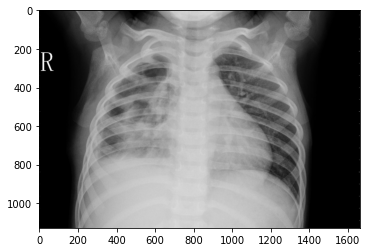

In [174]:

for i in os.listdir(pred_dir):
    img = image.load_img(pred_dir + '//'+ i)
    plt.imshow(img, cmap='gray')
    

    x = image.img_to_array(img_array)
    x = np.expand_dims(x, axis = 0)
    images = np.vstack([x])
    """
    #value = model.predict(images)

    if value == 0:
        plt.title = 'Bacterial'
    elif value == 1:
        plt.title = 'Normal'
    elif value == 2:
        plt.title = 'Viral'
    plt.show()"""
    